In [1]:
import joblib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_datasets():
    white_wine_data = pd.read_csv("datasets/winequality-white.csv", sep=';')
    red_wine_data = pd.read_csv("datasets/winequality-white.csv", sep=';')

    #Add new column to identify the wine type
    white_wine_data['wine_type'] = 1
    red_wine_data['wine_type'] = 0

    # Merge the data
    combine_df = pd.concat([white_wine_data, red_wine_data], ignore_index=True)

    return combine_df

In [3]:
df = load_datasets()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9796 entries, 0 to 9795
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         9796 non-null   float64
 1   volatile acidity      9796 non-null   float64
 2   citric acid           9796 non-null   float64
 3   residual sugar        9796 non-null   float64
 4   chlorides             9796 non-null   float64
 5   free sulfur dioxide   9796 non-null   float64
 6   total sulfur dioxide  9796 non-null   float64
 7   density               9796 non-null   float64
 8   pH                    9796 non-null   float64
 9   sulphates             9796 non-null   float64
 10  alcohol               9796 non-null   float64
 11  quality               9796 non-null   int64  
 12  wine_type             9796 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 995.0 KB


In [5]:
df.shape

(9796, 13)

In [6]:
df.duplicated().sum()

np.int64(1874)

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64

In [8]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [9]:
## Dropping Duplicated value
df.drop_duplicates(inplace=True)

In [10]:
df.columns = df.columns.str.replace(' ', '_')

In [11]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000,7922.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835,0.500000
std,0.866805,0.103431,0.122438,4.861339,0.023101,17.208934,43.126343,0.002904,0.151536,0.113516,1.216999,0.890626,0.500032
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000,0.500000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


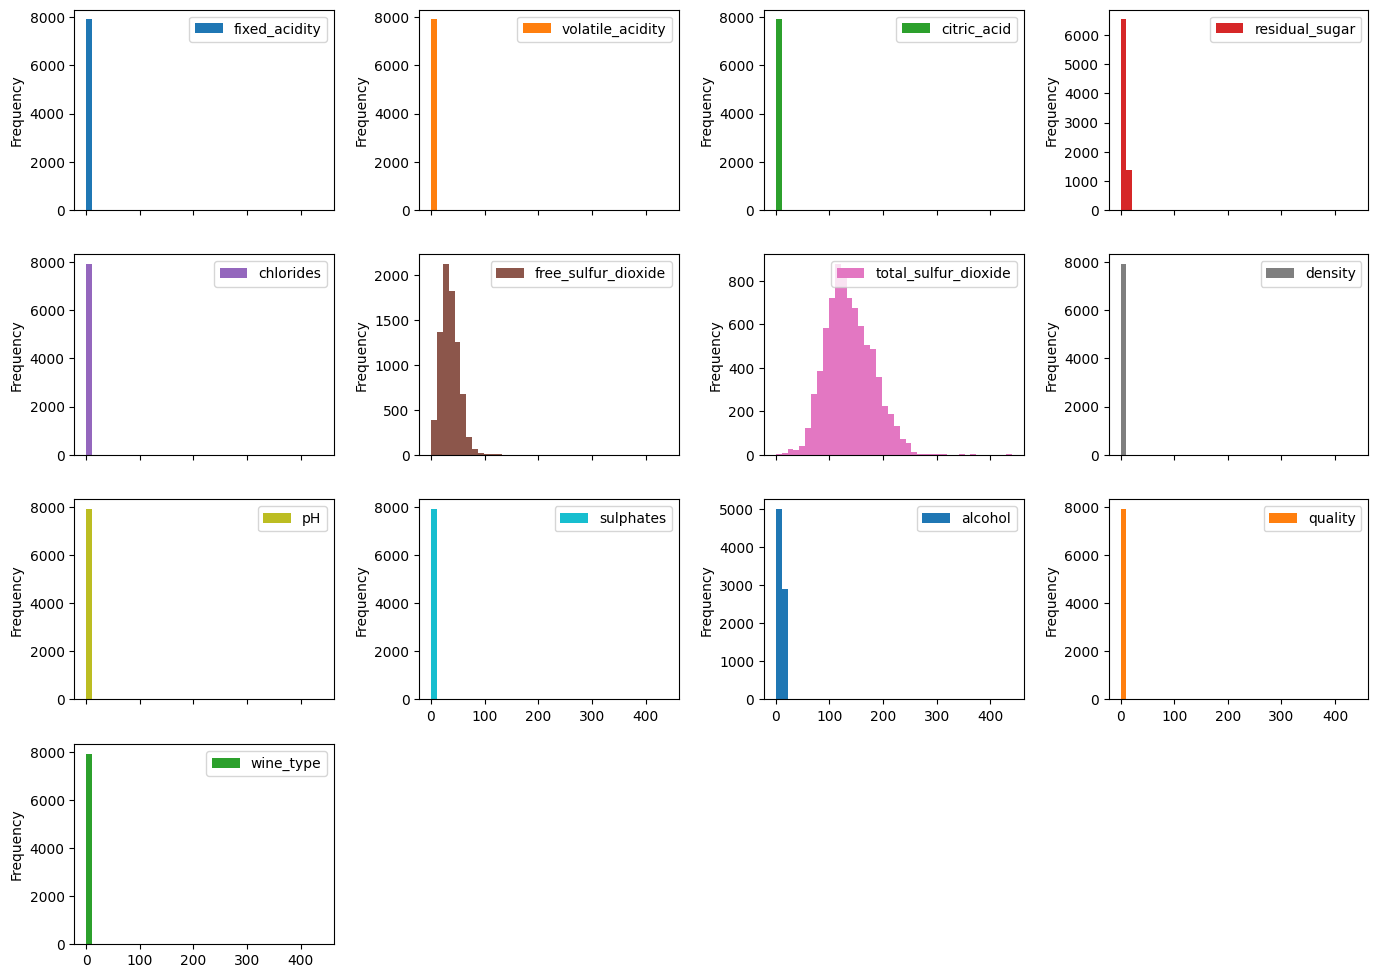

In [12]:
df.select_dtypes(include='number').plot(
    kind='hist',
    subplots=True,
    layout=(4, 4),
    figsize=(14, 10),
    bins=40
)
plt.tight_layout(pad=1.5)
plt.show()

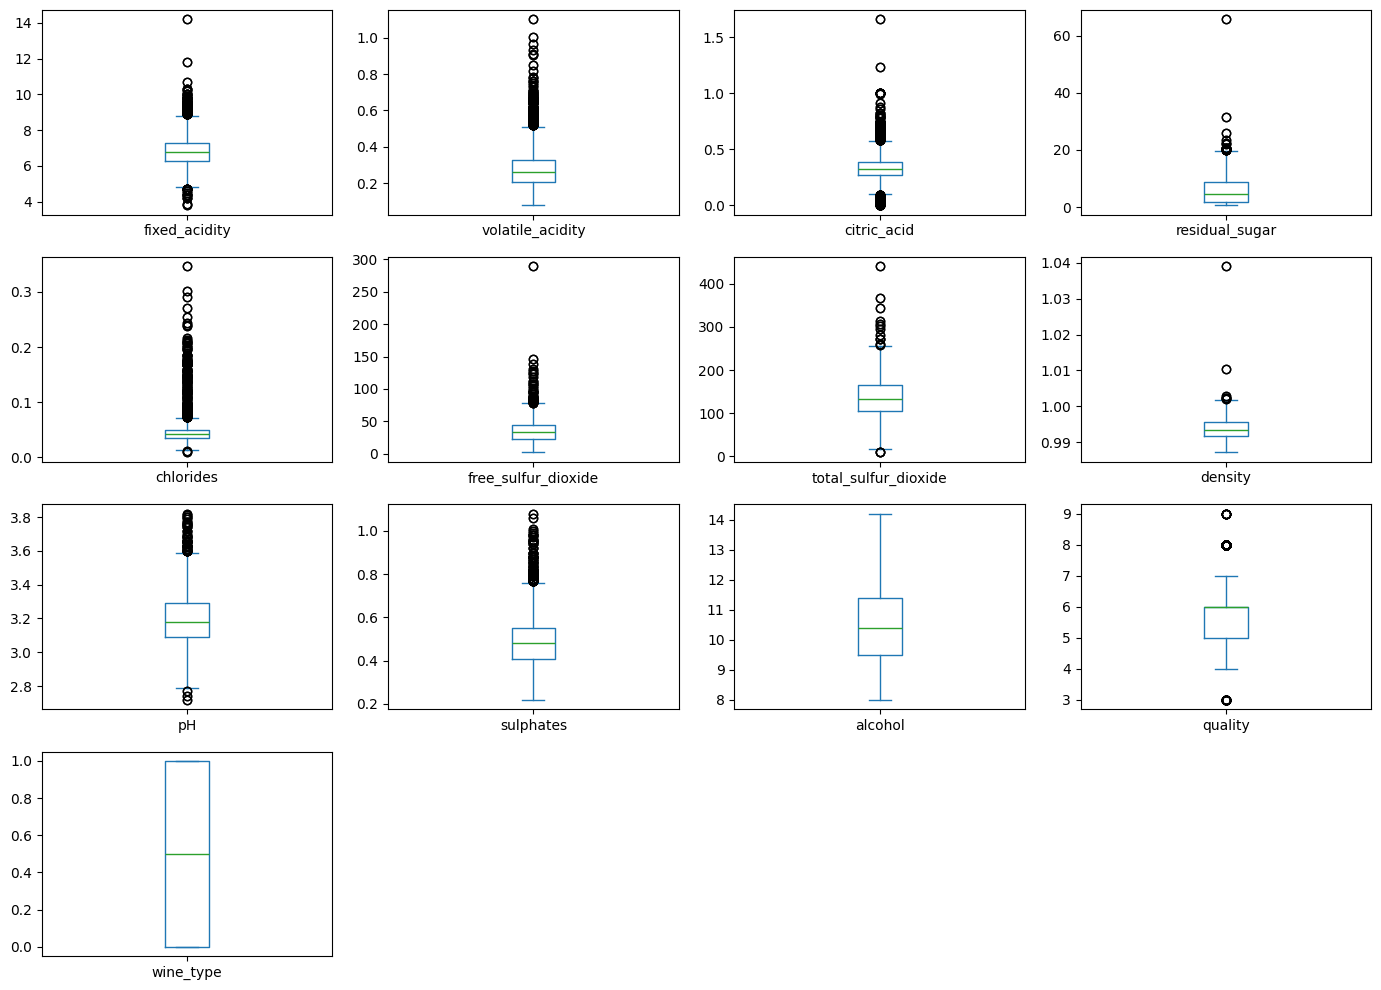

In [13]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 10), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

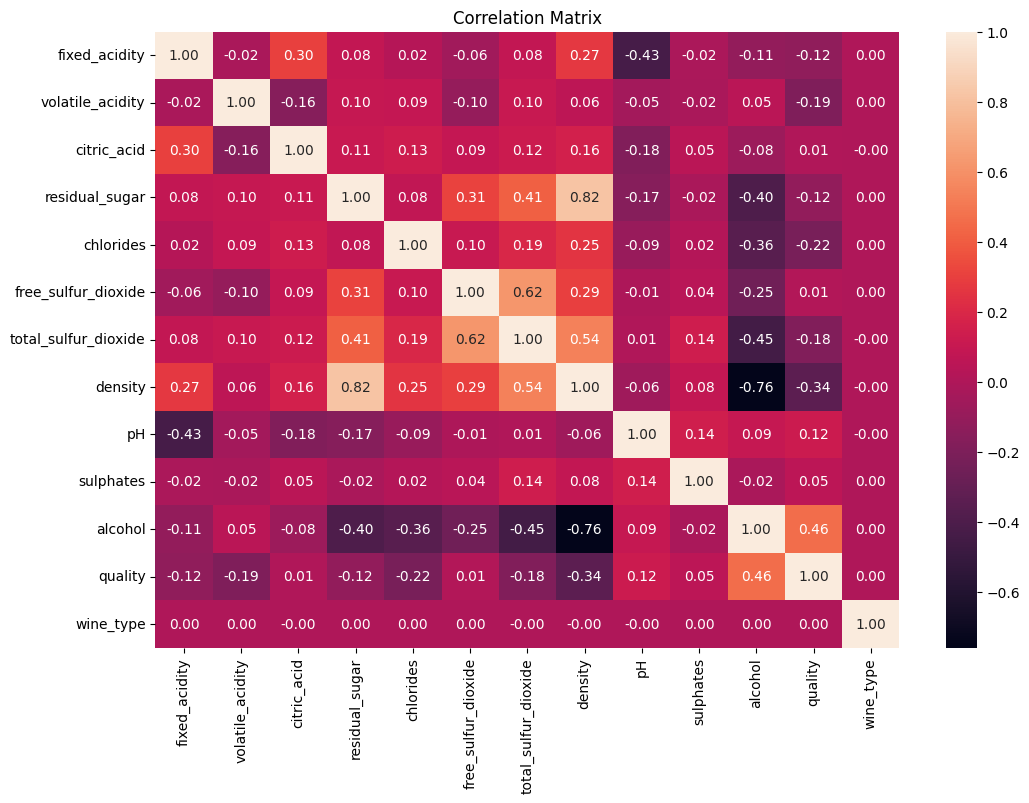

In [14]:
def Heatmap(df):
    plt.figure(figsize=(12, 8))    
    sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
    plt.title("Correlation Matrix")
    plt.show()

Heatmap(df)

In [15]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_clean

df_clean = remove_outliers(df)

In [16]:
## Using algorithm to features selection
def features_selection_algo(df_clean):
    X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop(['quality', 'wine_type'], axis=1), df_clean['quality'], test_size=0.33, random_state=42)

    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    features = pd.Series(rf_model.feature_importances_, index=X_train.columns)
    return features.sort_values(ascending=False)

In [17]:
print(features_selection_algo(df_clean))

alcohol                 0.118389
density                 0.108412
total_sulfur_dioxide    0.095855
free_sulfur_dioxide     0.094060
residual_sugar          0.089742
volatile_acidity        0.088222
pH                      0.088120
citric_acid             0.081293
chlorides               0.080976
sulphates               0.080755
fixed_acidity           0.074175
dtype: float64


In [18]:
def features_selection(df_clean):
    features = df_clean[['wine_type', 'alcohol', 'density', 'volatile_acidity', 'pH', 'chlorides', 'free_sulfur_dioxide', 'residual_sugar', 'total_sulfur_dioxide', 'citric_acid', 'sulphates', 'fixed_acidity']]
    return features

In [19]:
def split_data(df_clean):
    X = features_selection(df_clean)
    y = df_clean['quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train, X_test, y_train, y_test

In [20]:
def model_selection(df_clean):
    features = features_selection(df_clean)
    X = features
    y = df_clean['quality']
    models = {
        'Logistic Regression': LogisticRegression(),
        'K Neighbors Classifier': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        'Decision Tree': DecisionTreeClassifier(),
    }

    for i, algo in models.items():
        score = cross_val_score(algo, X, y, cv=5)
        print(f"{i} accuracy score: {score.mean():.4f}")
model_selection(df_clean)

Logistic Regression accuracy score: 0.4899
K Neighbors Classifier accuracy score: 0.5905
Naive Bayes accuracy score: 0.4935
Decision Tree accuracy score: 1.0000


In [21]:
# Hyperparameter tunning for decision tree
def hyperparameter_tunning():
    X_train, X_test, y_train, y_test = split_data(df_clean)
    models = {
        'DecisionTreeClassifier': DecisionTreeClassifier(),
        'GaussianNB': GaussianNB(),
        'KNeighborsClassifier': KNeighborsClassifier(),
        'LogisticRegression': LogisticRegression()
    }
    params = {
        'DecisionTreeClassifier': {
            'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth': [3, 5, 7, 9, None],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 6],
            'max_leaf_nodes': [None, 10, 20, 30],
        },
        'GaussianNB': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        },
        'KNeighborsClassifier': {
            'n_neighbors': [5, 10, 15, 20],
            'weights': ['uniform', 'distance'],
            'metric': ['cosine', 'euclidean', 'manhattan'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        },
        'LogisticRegression': {
            'penalty': ['l1', 'l2', 'elasticnet', None],
        }
    }
    for i in models:
        grid = GridSearchCV(models[i], params[i], cv=5, return_train_score=False)
        grid.fit(X_train, y_train)
        print(f"{grid.best_params_}, {grid.best_score_}")

print(hyperparameter_tunning())

{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}, 0.7525625744934445
{'var_smoothing': 1e-06}, 0.5060786650774732
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}, 0.7458879618593564
{'penalty': None}, 0.49010727056019066
None


In [22]:
def ensembled_model():
    # Building a pipeline
    col = features_selection(df_clean)

    # Convert the dataframe into simple list of strings
    if hasattr(col, 'columns'):
        colmn = col.columns.tolist()
    elif hasattr(col, 'tolist'):
        colmn = col.tolist()
    else:
        colmn = list(col)

    processor = ColumnTransformer(transformers=[
        ('imputer', SimpleImputer(strategy='mean'), colmn),
        ('Scaler', StandardScaler(), colmn)
    ])

    estimaters = [
        ('dt', DecisionTreeClassifier(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5)),
        ('lr', LogisticRegression()),
        ('nb', GaussianNB())
    ]

    meta_model = RandomForestClassifier()

    sc_model = StackingClassifier(
        estimators = estimaters, 
        final_estimator=meta_model,
        n_jobs=1
    )
    X_train, X_test, y_train, y_test = split_data(df_clean)
    
    final_pipeline = Pipeline(steps=[
        ('processor', processor),
        ('classifier', sc_model)
    ])
    final_pipeline.fit(X_train, y_train)
    y_pred = final_pipeline.predict(X_test)
    return y_test, y_pred, final_pipeline

In [23]:
y_pred, y_test, final_estimater = ensembled_model()

print("\n", classification_report(y_test, y_pred))


               precision    recall  f1-score   support

           4       0.62      0.86      0.72        43
           5       0.81      0.84      0.82       573
           6       0.88      0.83      0.85      1081
           7       0.76      0.82      0.79       370

    accuracy                           0.83      2067
   macro avg       0.77      0.84      0.80      2067
weighted avg       0.83      0.83      0.83      2067



In [24]:
## Save the model

joblib.dump(final_estimater, "model/estimater.pkl")

['model/estimater.pkl']

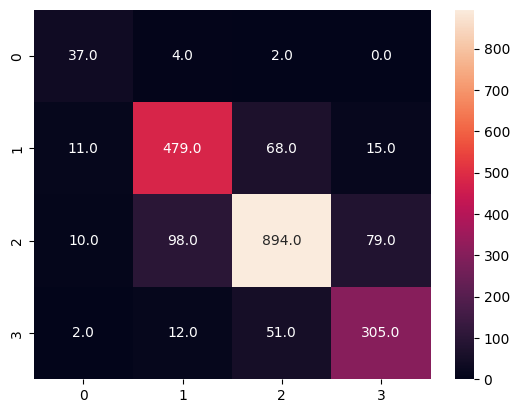

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.1f')
plt.show()